In [1]:
#

VBox()

Starting Spark application


ID,YARN Application ID,Kind,State,Spark UI,Driver log,User,Current session?
0,application_1686481539987_0001,pyspark,idle,Link,Link,None,✔


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

SparkSession available as 'spark'.


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [160]:
sc.install_pypi_package('numpy')
sc.install_pypi_package('pandas')
sc.install_pypi_package('fsspec')
sc.install_pypi_package('s3fs')
sc.install_pypi_package('matplotlib')
sc.install_pypi_package('seaborn')
sc.install_pypi_package('PyArrow')
sc.install_pypi_package('plotly')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly

import pyspark.pandas as ps
import pyspark.sql.functions as F

Matplotlib created a temporary config/cache directory at /tmp/matplotlib-pb0mbk7p because the default path (/home/calbao/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.
/usr/local/spark/python/pyspark/pandas/__init__.py:49: UserWarning: 'PYARROW_IGNORE_TIMEZONE' environment variable was not set. It is required to set this environment variable to '1' in both driver and executor sides if you use pyarrow>=2.0.0. pandas-on-Spark will set it for you but it does not work if there is a Spark context already launched.
  warnings.warn(


# EDA

## Loading the parquet

In [44]:
df = spark.read.parquet(
    's3://bdcc2023-lab2-jwong/e-15ZHHQNC8TSKL9JVQ7ZZ6OU54/ssot-data/')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [45]:
df = df.filter(F.col('metadata').isNotNull())

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

## Top Contributing Authors

In [46]:
top_authors = df.select(
    F.explode(F.arrays_zip('metadata.authors.first',
              'metadata.authors.last')).alias('fullname')
)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [32]:
top_authors = (
    df
    .select(F.concat_ws(' ', 'fullname.first', 'fullname.last').alias('fullname'))
    .groupby('fullname')
    .count()
    .orderBy('count', ascending=False)
)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [39]:
top_authors.filter(F.size(F.split(F.trim('fullname'), ' ')) >= 2).show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-----------------+-----+
|         fullname|count|
+-----------------+-----+
|   Kwok-Yung Yuen|  106|
|         Wei Wang|   82|
|Christian Drosten|   78|
| Benjamin Cowling|   76|
|           Yan Li|   71|
|       George Gao|   69|
|      Ziad Memish|   68|
|      Lin-Fa Wang|   67|
|        Wei Zhang|   65|
|           Wei Li|   62|
|    Janet Englund|   58|
|      Ralph Baric|   57|
|             Y Li|   55|
|      Shibo Jiang|   53|
|        Jing Wang|   51|
|           Y Wang|   51|
|      Patrick Woo|   51|
|         Yang Liu|   50|
|          Wei Liu|   50|
|      Susanna Lau|   50|
+-----------------+-----+
only showing top 20 rows

In [40]:
df_authors = top_authors.filter(
    F.size(F.split(F.trim('fullname'), ' ')) >= 2).limit(100).toPandas()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [161]:
df_authors.to_csv(
    's3://bdcc2023-lab2-jwong/e-15ZHHQNC8TSKL9JVQ7ZZ6OU54/pandas_df/top_authors.csv', index=False)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

## Top Contributing Institutions

In [189]:
df.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- metadata: struct (nullable = true)
 |    |-- authors: array (nullable = true)
 |    |    |-- element: struct (containsNull = true)
 |    |    |    |-- affiliation: struct (nullable = true)
 |    |    |    |    |-- institution: string (nullable = true)
 |    |    |    |    |-- laboratory: string (nullable = true)
 |    |    |    |    |-- location: struct (nullable = true)
 |    |    |    |    |    |-- addrLine: string (nullable = true)
 |    |    |    |    |    |-- country: string (nullable = true)
 |    |    |    |    |    |-- postBox: string (nullable = true)
 |    |    |    |    |    |-- postCode: string (nullable = true)
 |    |    |    |    |    |-- region: string (nullable = true)
 |    |    |    |    |    |-- settlement: string (nullable = true)
 |    |    |    |-- email: string (nullable = true)
 |    |    |    |-- first: string (nullable = true)
 |    |    |    |-- last: string (nullable = true)
 |    |    |    |-- middle: array (nullable = true)
 |    |    |    |    

In [61]:
top_institutions = (
    df
    .select(F.explode('metadata.authors.affiliation.institution').alias('institution'))
    .filter(F.col('institution').isNotNull() & (F.col('institution') != ''))
    .groupby('institution')
    .count()
    .orderBy('count', ascending=False)
)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [63]:
top_institutions.show(truncate=False)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+---------------------------------------------+-----+
|institution                                  |count|
+---------------------------------------------+-----+
|Chinese Academy of Sciences                  |1880 |
|Huazhong University of Science and Technology|1869 |
|University of California                     |1379 |
|NSW                                          |1352 |
|National Institutes of Health                |1197 |
|The University of Hong Kong                  |1045 |
|University of Washington                     |897  |
|Zhejiang University                          |779  |
|Fudan University                             |752  |
|University of Oxford                         |750  |
|Harvard Medical School                       |704  |
|Chinese Academy of Agricultural Sciences     |659  |
|Wuhan University                             |648  |
|University of Toronto                        |597  |
|University of Pennsylvania                   |573  |
|Capital Medical University 

In [64]:
df_institutions = top_institutions.limit(100).toPandas()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [162]:
df_institutions.to_csv(
    's3://bdcc2023-lab2-jwong/e-15ZHHQNC8TSKL9JVQ7ZZ6OU54/pandas_df/top_institutions.csv', index=False)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

## Top Countries

In [ ]:
top_countries = (
    df
    .select(
        'metadata.authors.affiliation.institution',
        F.explode('metadata.authors.affiliation.location.country').alias(
            'country')
    )
    .filter(F.col('country').isNotNull() & (F.col('country') != ''))
    .select(F.initcap(F.lower(F.trim('country'))).alias('country'))
    .select(F.regexp_replace('country', r"[^\w\s]", "").alias('country'))
    .select(F.when(F.lower('country').like('%china%'), 'China').otherwise(F.col('country')).alias('country'))
    .select(F.when(F.lower('country').like('%italy%'), 'Italy').otherwise(F.col('country')).alias('country'))
    .select(F.when(F.lower('country').like('%france%'), 'France').otherwise(F.col('country')).alias('country'))
    .select(F.when(F.lower('country').like('%spain%'), 'Spain').otherwise(F.col('country')).alias('country'))
    .select(F.when(F.lower('country').like('%germany%'), 'Germany').otherwise(F.col('country')).alias('country'))
    .select(F.when(F.lower('country').like('%canada%'), 'Canada').otherwise(F.col('country')).alias('country'))
    .select(F.when(F.lower('country').like('%korea%'), 'Korea').otherwise(F.col('country')).alias('country'))
    .select(F.when(F.lower('country').like('%india%'), 'India').otherwise(F.col('country')).alias('country'))
    .select(F.when(F.lower('country').like('%japan%'), 'Japan').otherwise(F.col('country')).alias('country'))
    .select(F.when(F.lower('country').like('%brazil%'), 'Brazil').otherwise(F.col('country')).alias('country'))
    .select(F.when(F.lower('country').like('%taiwan%'), 'Taiwan').otherwise(F.col('country')).alias('country'))
    .select(F.when(F.lower('country').like('%netherlands%'), 'Netherlands').otherwise(F.col('country')).alias('country'))
    .select(F.when(F.lower('country').like('%australi%'), 'Australia').otherwise(F.col('country')).alias('country'))
    .select(
        F.when(F.lower(('country')).like('us%') | F.lower('country').like('%united s%'),
               'United States of America').otherwise(F.col('country')).alias('country')
    )
    .select(
        F.when(F.lower(('country')).like('uk%') | F.lower('country').like('%united k%'),
               'United Kingdom').otherwise(F.col('country')).alias('country')
    )
    .groupby('country')
    .count()
    .orderBy('count', ascending=False)
)

In [136]:
top_countries = (
    df
    .select(F.explode('metadata.authors.affiliation.location.country').alias('country'))
    .filter(F.col('country').isNotNull() & (F.col('country') != ''))
    .select(F.initcap(F.lower(F.trim('country'))).alias('country'))
    .select(F.regexp_replace('country', r"[^\w\s]", "").alias('country'))
    .select(F.when(F.lower('country').like('%china%'), 'China').otherwise(F.col('country')).alias('country'))
    .select(F.when(F.lower('country').like('%italy%'), 'Italy').otherwise(F.col('country')).alias('country'))
    .select(F.when(F.lower('country').like('%france%'), 'France').otherwise(F.col('country')).alias('country'))
    .select(F.when(F.lower('country').like('%spain%'), 'Spain').otherwise(F.col('country')).alias('country'))
    .select(F.when(F.lower('country').like('%germany%'), 'Germany').otherwise(F.col('country')).alias('country'))
    .select(F.when(F.lower('country').like('%canada%'), 'Canada').otherwise(F.col('country')).alias('country'))
    .select(F.when(F.lower('country').like('%korea%'), 'Korea').otherwise(F.col('country')).alias('country'))
    .select(F.when(F.lower('country').like('%india%'), 'India').otherwise(F.col('country')).alias('country'))
    .select(F.when(F.lower('country').like('%japan%'), 'Japan').otherwise(F.col('country')).alias('country'))
    .select(F.when(F.lower('country').like('%brazil%'), 'Brazil').otherwise(F.col('country')).alias('country'))
    .select(F.when(F.lower('country').like('%taiwan%'), 'Taiwan').otherwise(F.col('country')).alias('country'))
    .select(F.when(F.lower('country').like('%netherlands%'), 'Netherlands').otherwise(F.col('country')).alias('country'))
    .select(F.when(F.lower('country').like('%australi%'), 'Australia').otherwise(F.col('country')).alias('country'))
    .select(
        F.when(F.lower(('country')).like('us%') | F.lower('country').like('%united s%'),
               'United States of America').otherwise(F.col('country')).alias('country')
    )
    .select(
        F.when(F.lower(('country')).like('uk%') | F.lower('country').like('%united k%'),
               'United Kingdom').otherwise(F.col('country')).alias('country')
    )
    .groupby('country')
    .count()
    .orderBy('count', ascending=False)
)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [137]:
top_countries.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+-----+
|             country|count|
+--------------------+-----+
|               China|33673|
|United States of ...|28247|
|               Italy| 9490|
|      United Kingdom| 8504|
|              France| 5707|
|             Germany| 4731|
|              Canada| 4524|
|               Spain| 4515|
|               Japan| 4437|
|           Australia| 4285|
|               Korea| 3809|
|               India| 3435|
|              Brazil| 2931|
|         Netherlands| 2906|
|              Taiwan| 2888|
|                Iran| 1750|
|         Switzerland| 1681|
|             Belgium| 1545|
|              Sweden| 1125|
|           Singapore| 1090|
+--------------------+-----+
only showing top 20 rows

**Top countries in uncleaned data**:

China, USA, Italy, United Kingdom, France, Germany, Spain, Canada, Japan, Australia, India, Brazil, Taiwan, Netherlands

In [138]:
distinct_countries = (
    df
    .select(F.explode('metadata.authors.affiliation.location.country').alias('country'))
    .filter(F.col('country').isNotNull() & (F.col('country') != ''))
    .distinct()
)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [139]:
(
    distinct_countries
    .select(F.initcap(F.lower(F.trim('country'))).alias('country'))
    .select(F.regexp_replace('country', r"[^\w\s]", "").alias('country'))
    .select(F.when(F.lower('country').like('%china%'), 'China').otherwise(F.col('country')).alias('country'))
    .select(F.when(F.lower('country').like('%italy%'), 'Italy').otherwise(F.col('country')).alias('country'))
    .select(F.when(F.lower('country').like('%france%'), 'France').otherwise(F.col('country')).alias('country'))
    .select(F.when(F.lower('country').like('%spain%'), 'Spain').otherwise(F.col('country')).alias('country'))
    .select(F.when(F.lower('country').like('%germany%'), 'Germany').otherwise(F.col('country')).alias('country'))
    .select(F.when(F.lower('country').like('%canada%'), 'Canada').otherwise(F.col('country')).alias('country'))
    .select(F.when(F.lower('country').like('%korea%'), 'Korea').otherwise(F.col('country')).alias('country'))
    .select(F.when(F.lower('country').like('%india%'), 'India').otherwise(F.col('country')).alias('country'))
    .select(F.when(F.lower('country').like('%japan%'), 'Japan').otherwise(F.col('country')).alias('country'))
    .select(F.when(F.lower('country').like('%brazil%'), 'Brazil').otherwise(F.col('country')).alias('country'))
    .select(F.when(F.lower('country').like('%taiwan%'), 'Taiwan').otherwise(F.col('country')).alias('country'))
    .select(F.when(F.lower('country').like('%netherlands%'), 'Netherlands').otherwise(F.col('country')).alias('country'))
    .select(F.when(F.lower('country').like('%australi%'), 'Australia').otherwise(F.col('country')).alias('country'))
    .select(
        F.when(F.lower(('country')).like('us%') | F.lower('country').like('%united s%'),
               'United States of America').otherwise(F.col('country')).alias('country')
    )
    .select(
        F.when(F.lower(('country')).like('uk%') | F.lower('country').like('%united k%'),
               'United Kingdom').otherwise(F.col('country')).alias('country')
    )
    .distinct()
).count()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

598

In [140]:
top_countries = (
    df
    .select(F.explode('metadata.authors.affiliation.location.country').alias('country'))
    .filter(F.col('country').isNotNull() & (F.col('country') != ''))
    .select(F.initcap(F.lower(F.trim('country'))).alias('country'))
    .select(F.regexp_replace('country', r"[^\w\s]", "").alias('country'))
    .select(F.when(F.lower('country').like('%china%'), 'China').otherwise(F.col('country')).alias('country'))
    .select(F.when(F.lower('country').like('%italy%'), 'Italy').otherwise(F.col('country')).alias('country'))
    .select(F.when(F.lower('country').like('%france%'), 'France').otherwise(F.col('country')).alias('country'))
    .select(F.when(F.lower('country').like('%spain%'), 'Spain').otherwise(F.col('country')).alias('country'))
    .select(F.when(F.lower('country').like('%germany%'), 'Germany').otherwise(F.col('country')).alias('country'))
    .select(F.when(F.lower('country').like('%canada%'), 'Canada').otherwise(F.col('country')).alias('country'))
    .select(F.when(F.lower('country').like('%korea%'), 'Korea').otherwise(F.col('country')).alias('country'))
    .select(F.when(F.lower('country').like('%india%'), 'India').otherwise(F.col('country')).alias('country'))
    .select(F.when(F.lower('country').like('%japan%'), 'Japan').otherwise(F.col('country')).alias('country'))
    .select(F.when(F.lower('country').like('%brazil%'), 'Brazil').otherwise(F.col('country')).alias('country'))
    .select(F.when(F.lower('country').like('%taiwan%'), 'Taiwan').otherwise(F.col('country')).alias('country'))
    .select(F.when(F.lower('country').like('%netherlands%'), 'Netherlands').otherwise(F.col('country')).alias('country'))
    .select(F.when(F.lower('country').like('%australi%'), 'Australia').otherwise(F.col('country')).alias('country'))
    .select(
        F.when(F.lower(('country')).like('us%') | F.lower('country').like('%united s%'),
               'United States of America').otherwise(F.col('country')).alias('country')
    )
    .select(
        F.when(F.lower(('country')).like('uk%') | F.lower('country').like('%united k%'),
               'United Kingdom').otherwise(F.col('country')).alias('country')
    )
    .groupby('country')
    .count()
    .orderBy('count', ascending=False)
)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [141]:
df_countries = top_countries.limit(100).toPandas()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [149]:
df_countries.head(20)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

                     country  count
0                      China  33673
1   United States of America  28247
2                      Italy   9490
3             United Kingdom   8504
4                     France   5707
5                    Germany   4731
6                     Canada   4524
7                      Spain   4515
8                      Japan   4437
9                  Australia   4285
10                     Korea   3809
11                     India   3435
12                    Brazil   2931
13               Netherlands   2906
14                    Taiwan   2888
15                      Iran   1750
16               Switzerland   1681
17                   Belgium   1545
18                    Sweden   1125
19                 Singapore   1090

In [163]:
df_countries.to_csv(
    's3://bdcc2023-lab2-jwong/e-15ZHHQNC8TSKL9JVQ7ZZ6OU54/pandas_df/top_countries.csv', index=False)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

### Plotting

In [2]:
import plotly.io as pio

pio.renderers.default = 'jupyterlab'

In [197]:
df_authors = ps.read_csv(
    's3://bdcc2023-lab2-jwong/e-15ZHHQNC8TSKL9JVQ7ZZ6OU54/pandas_df/top_authors.csv')
df_institutions = ps.read_csv(
    's3://bdcc2023-lab2-jwong/e-15ZHHQNC8TSKL9JVQ7ZZ6OU54/pandas_df/top_institutions.csv')
df_countries = ps.read_csv(
    's3://bdcc2023-lab2-jwong/e-15ZHHQNC8TSKL9JVQ7ZZ6OU54/pandas_df/top_countries.csv')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

/mnt/yarn/usercache/livy/appcache/application_1686481539987_0001/container_1686481539987_0001_01_000001/pyspark.zip/pyspark/pandas/utils.py:975: PandasAPIOnSparkAdviceWarning:

If `index_col` is not specified for `read_csv`, the default index is attached which can cause additional overhead.

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

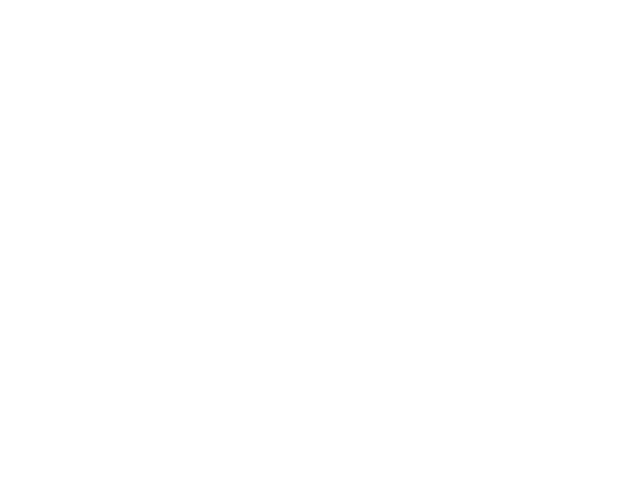

In [200]:
df_authors.iloc[:10].plot.bar(x='count', y='fullname')

%matplot plt

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

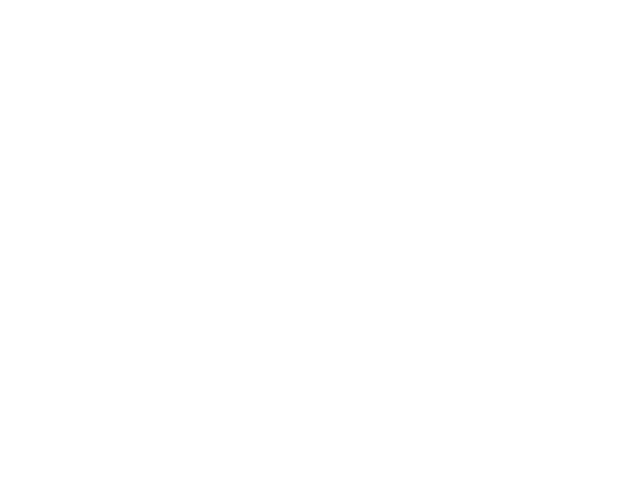

In [201]:
df_institutions.iloc[:10].plot.bar(x='count', y='institution')

%matplot plt

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

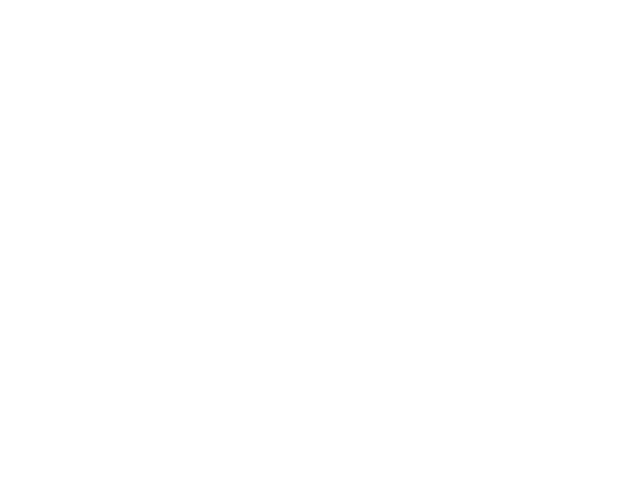

In [202]:
df_countries.iloc[:10].plot.bar(x='count', y='country')

%matplot plt

# Ching

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import pyspark.pandas as ps
from pyspark.sql import SparkSession
import pyspark.sql.functions as F

import plotly.graph_objects as go
import plotly
import json
import warnings
warnings.filterwarnings("ignore")

from scipy.stats import (
    norm, t, kstest, mannwhitneyu, levene, kruskal, ks_2samp
)

import plotly
import joblib
import json
import warnings
warnings.filterwarnings("ignore")

spark = (
    SparkSession
    .builder
    .master('local[*]')
    .config('spark.sql.execution.arrow.pyspark.enabled', 'true')
    .getOrCreate()
)

In [3]:
df_authors = ps.read_csv('top_authors.csv')
df_institutions = ps.read_csv('top_institutions.csv')
df_countries = ps.read_csv('top_countries.csv')

In [11]:
fig_auth = (df_authors.iloc[:10]
            .sort_values('count')
            .plot.bar(x='count', y='fullname')
           )

(fig_auth.update_layout(template="plotly_white",
                        xaxis_title="Count of Publications",
                        yaxis_title="Authors",
                        title="Top Contributing Authors"
                        )
 .update_traces(marker_color='#BE75E1'))

fig_auth.show(config={
    "editable": True,
    'toImageButtonOptions': {
        'format': 'png',  # one of png, svg, jpeg, webp
        'filename': 'fig_auth',
        'scale': 5  # Multiply title/legend/axis/canvas sizes by this factor
    }
})

In [15]:
fig_inst = (df_institutions.iloc[:10]
            .sort_values('count')
            .plot.bar(x='count', y='institution')
           )

(fig_inst.update_layout(template="plotly_white",
                        xaxis_title="Count of Publications",
                        yaxis_title="Institutions",
                        title="Top Contributing Institutions"
                        )
 .update_traces(marker_color='#8936E0'))

fig_inst.show(config={
    "editable": True,
    'toImageButtonOptions': {
        'format': 'png',  # one of png, svg, jpeg, webp
        'filename': 'fig_inst',
        'scale': 5  # Multiply title/legend/axis/canvas sizes by this factor
    }
})

In [16]:
fig_cntry = (df_countries.iloc[:10]
            .sort_values('count')
            .plot.bar(x='count', y='country')
           )

(fig_cntry.update_layout(template="plotly_white",
                        xaxis_title="Count of Publications",
                        yaxis_title="Countries",
                        title="Top Contributing Countries"
                        )
 .update_traces(marker_color='#441E82'))

fig_cntry.show(config={
    "editable": True,
    'toImageButtonOptions': {
        'format': 'png',  # one of png, svg, jpeg, webp
        'filename': 'fig_cntry',
        'scale': 5  # Multiply title/legend/axis/canvas sizes by this factor
    }
})